# 16.B

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [2]:
def threshold(x, theta):
  if x >= theta:
    return 1
  else:
    return 0

In [3]:
class Neuron:
  def __init__(self, num_inputs, weights, theta):
    self.num_inputs = num_inputs
    self.weights = weights
    self.theta = theta
  
  def activate(self, inputs):
    x = sum([self.weights[i] * inputs[i] for i in range(self.num_inputs)])
    y = threshold(x, self.theta)
    return y

In [4]:
class MLP:
  def __init__(self):
    self.layer1 = [Neuron(2, [1, 1], 1), Neuron(2, [1, -1], 0), Neuron(2, [-1, 1], 0), Neuron(2, [-1, -1], -1)]
    self.layer2 = [Neuron(4, [1, -1, -1, -1], 1)]

  def activate(self, inputs):
    layer1_outputs = [neuron.activate(inputs) for neuron in self.layer1]
    self.layer1_outputs = layer1_outputs
    layer2_inputs = np.array(layer1_outputs)
    layer2_output = self.layer2[0].activate(layer2_inputs)
    return layer2_output

In [5]:
xor_inputs = [(0, 0), (0, 1), (1, 0), (1, 1)]
xor_outputs = [x[0]^x[1] for x in xor_inputs]

In [6]:
mlp = MLP()

In [7]:
for epoch in range(10000):
  for i in range(len(xor_inputs)):
    inputs = np.array(xor_inputs[i])
    target = xor_outputs[i]
    output = mlp.activate(inputs)
    error = target - output
    if error != 0:
      mlp.layer2[0].weights += error * np.array(mlp.layer1_outputs)

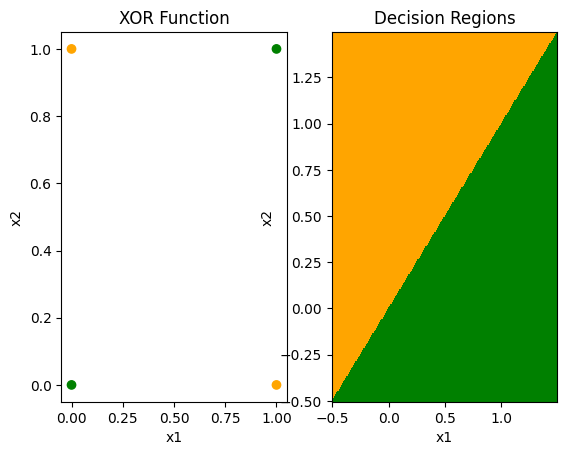

In [8]:
cmap = ListedColormap(['green', 'orange'])

plt.subplot(1, 2, 1)
plt.title('XOR Function')
plt.xlabel('x1')
plt.ylabel('x2')
plt.scatter([x[0] for x in xor_inputs], [x[1] for x in xor_inputs], c = xor_outputs, cmap = cmap)

h = 0.01
x_min, x_max = -0.5, 1.5
y_min, y_max = -0.5, 1.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
z = np.array([mlp.activate(np.array([x, y])) for x, y in np.c_[xx.ravel(), yy.ravel()]])
z = z.reshape(xx.shape)
plt.subplot(1, 2, 2)
plt.title('Decision Regions')
plt.xlabel('x1')
plt.ylabel('x2')
plt.pcolormesh(xx, yy, z, cmap = cmap)